## Python Frontend
This notebook demonstrates the Python frontend to MPB.

In [1]:
%load_ext autoreload
%autoreload 2
from mpb import MPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

In [2]:
mpb = MPB()

Using planner rrt.
Using steer function reeds_shepp.


Any configuration values (or subtrees) can be set and retrieved using the bracket operator on the `MPB` instance. The key is a string and by using the dot-notation, a path can be given:

In [3]:
mpb["ompl.seed"] = 4  # set the seed of the OMPL planners

Some helper functions are available to set environment properties, and configure the planners, steer functions and post smoothers:

In [4]:
mpb.set_corridor_grid_env(radius = 3)
mpb.set_planners(['rrt', 'rrt_star', 'informed_rrt_star'])

Using planner informed_rrt_star.
Using planner rrt.
Using planner rrt_star.


Run the motion planning benchmark:

In [5]:
mpb.run(id='test_run', runs=3)  # optional run ID, number of runs (environments)

Running MPB with ID test_run (log file at test_run.log)...
9


Visualize the planner trajectories:

Visualizing test_run_results.json


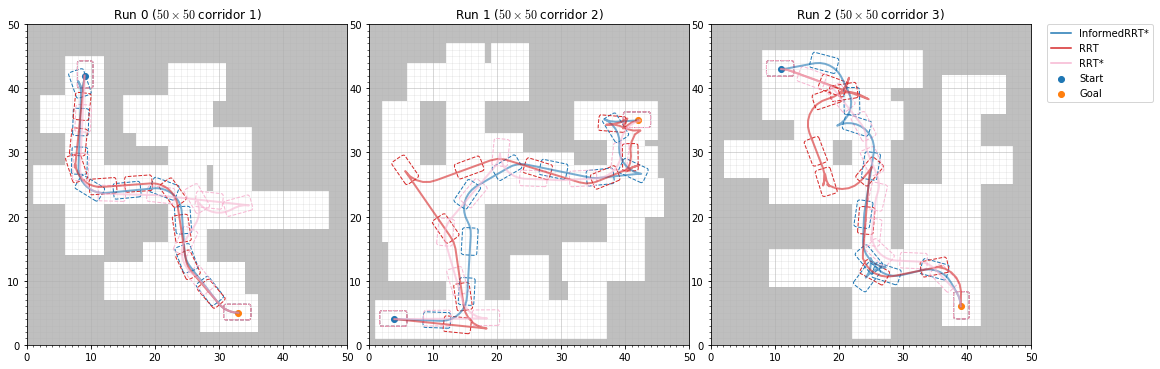

In [6]:
mpb.visualize_trajectories()

Plot planner statistics:

Visualizing test_run_results.json...


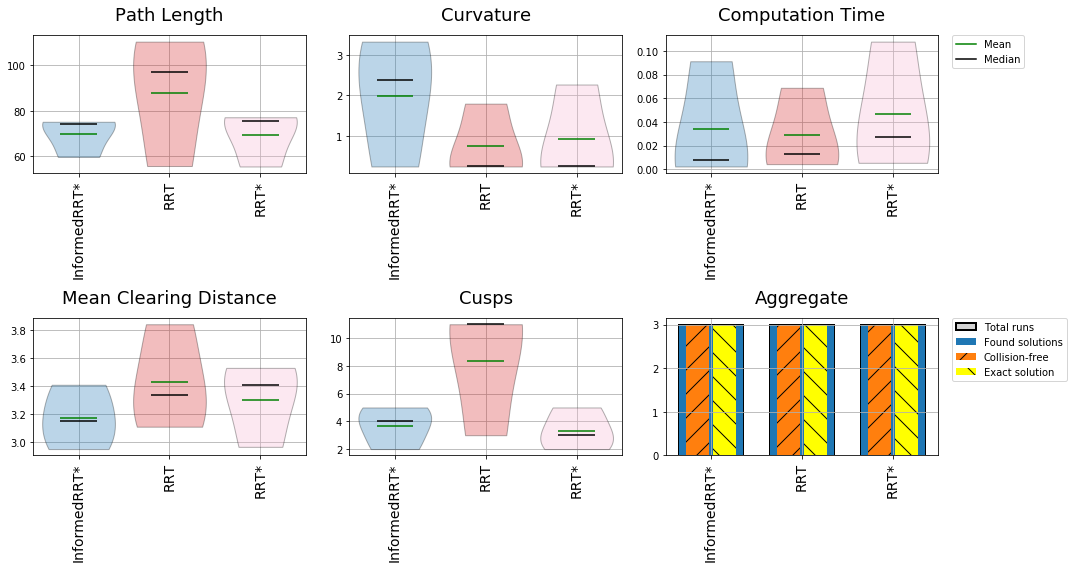

In [7]:
mpb.plot_planner_stats()

We can also use the frontend to compare the solutions of the anytime planners over the course of a given time interval. Let's take an Informed RRT* planner and run it on the time allotments of 0.5s, 1s and 10s:

In [8]:
ms = []
for time in [.5, 1, 10]:
    m = MPB()    
    m["max_planning_time"] = time
    m.set_corridor_grid_env(width=150, height=150, branches=100, radius=3)
    m.set_planners(['informed_rrt_star'])
    m.set_steer_functions(['reeds_shepp'])
    m.run('anytime_%.1f' % time)
    ms.append(m)    

Using planner rrt.
Using steer function reeds_shepp.
Using planner informed_rrt_star.
Using steer function reeds_shepp.
Running MPB with ID anytime_0.5 (log file at anytime_0.5.log)...
1



Using planner rrt.
Using steer function reeds_shepp.
Using planner informed_rrt_star.
Using steer function reeds_shepp.
Running MPB with ID anytime_1.0 (log file at anytime_1.0.log)...
1



Using planner rrt.
Using steer function reeds_shepp.
Using planner informed_rrt_star.
Using steer function reeds_shepp.
Running MPB with ID anytime_10.0 (log file at anytime_10.0.log)...
1


Visualize the results:

Visualizing anytime_0.5_results.json
Running headless
Visualizing anytime_1.0_results.json
Running headless
Visualizing anytime_10.0_results.json
Running headless


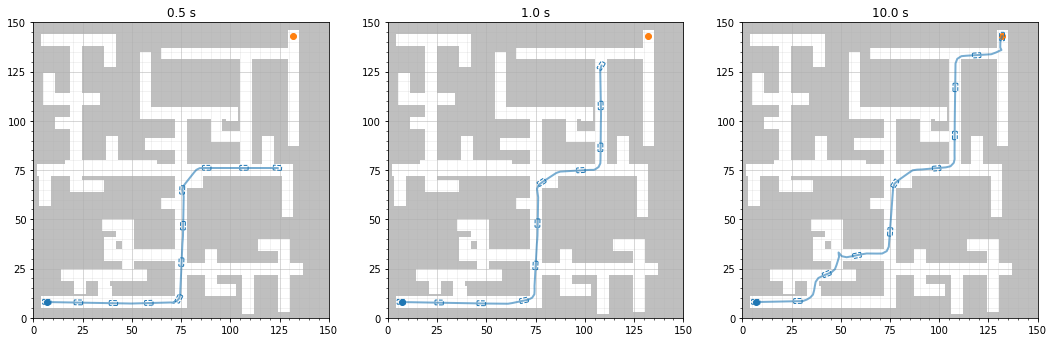

In [10]:
plt.figure(figsize=(6 * len(ms), 6))
for i, m in enumerate(ms):
    plt.subplot(1, len(ms), i+1)
    m.visualize_trajectories(headless=True, combine_views=False, use_existing_subplot=True, show_legend=False)
    plt.title("%.1f s" % m["max_planning_time"])